In [1]:
import numpy as np
from numpy import loadtxt

from pyESN import ESN
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def myMSE(prediction,target):
    return np.sqrt(np.mean((prediction.flatten() - target.flatten() )**2))

def residuals(prediction,target):
    return (target.flatten() - prediction.flatten())

def plotResults(data, fit, pred, resTrain, resTest):
    trainlen = len(fit)
    testlen  = len(pred)
    
    
    plt.figure(figsize=(14,6))
    plt.subplot(2,1,1)
    plt.plot(range(0,trainlen+testlen), data,'k',  linewidth=2, label="data")
    plt.plot(range(0,trainlen),fit,'--g',  linewidth=2, alpha=0.9, label="train")
    plt.plot(range(trainlen,trainlen+testlen), pred,'--r', linewidth=2,  alpha=1, label="test")
    lo,hi = plt.ylim()
    plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'--b',alpha=0.8, linewidth=4)
    plt.ylabel('Target')
    plt.legend(loc=(0.1,1.1),fontsize=18,ncol=3)
    plt.tight_layout()
    #
    plt.subplot(2,1,2)
    plt.plot(range(0,trainlen),resTrain,'--g',  linewidth=2, alpha=0.9, label="train")
    plt.plot(range(trainlen,trainlen+testlen), resTest,'--r', linewidth=2,  alpha=1, label="test")
    lo,hi = plt.ylim()
    plt.plot([trainlen,trainlen],[lo+np.spacing(1),hi-np.spacing(1)],'--b',alpha=0.8, linewidth=4)
    plt.tight_layout()
    plt.ylabel('Residuals')
    plt.xlabel('time')


In [18]:
def prepareData(target, train_perc=0.9, plotshow=False):
    datalen =  len(target)        
    trainlen = int(train_perc*datalen)
    testlen  = datalen-trainlen

# Train/Test sets
    trainTarget = target[:trainlen]
    testTarget  = target[trainlen:trainlen+testlen]    
    inputTrain = np.ones(trainlen)
    inputTest  = np.ones(testlen)
        
    if plotshow:
        plt.figure(figsize=(14,3))
        plt.plot(range(0,trainlen), trainTarget,'r',label='Train')
        plt.plot(range(trainlen,trainlen+testlen), testTarget,'-g',label='Test')
        plt.legend(loc=(0.1,1.1),fontsize=18,ncol=2)
        plt.tight_layout()
        
    return trainTarget, testTarget, inputTrain, inputTest

# Rossler System: Chemical reactions

The time series consist of  20000  points.


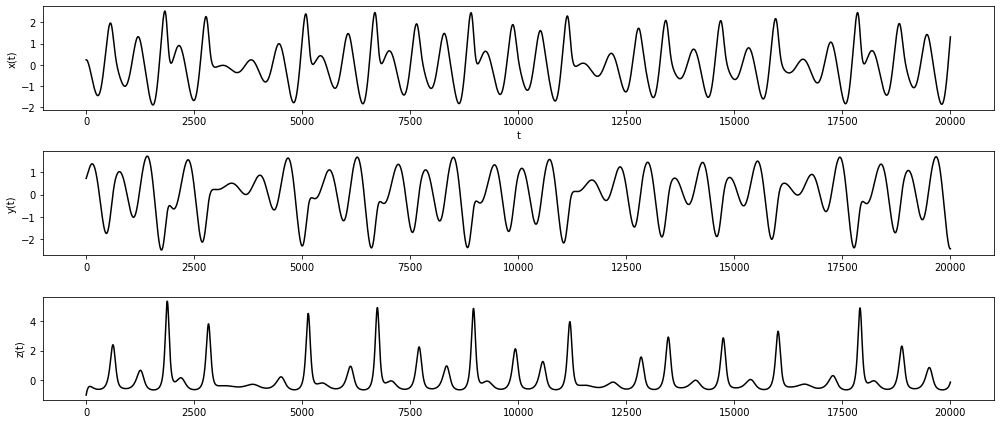

In [4]:
xdata = loadtxt("data/x.dat")
ydata = loadtxt("data/y.dat")
zdata = loadtxt("data/z.dat")
print("The time series consist of ", len(xdata), " points.")

plt.figure(figsize=(14,6))
plt.subplot(3,1,1)
plt.plot(xdata,'k')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.subplot(3,1,2)
plt.plot(ydata,'k')
plt.ylabel('y(t)')
plt.subplot(3,1,3)
plt.plot(zdata,'k')
plt.ylabel('z(t)');
plt.tight_layout()

In [5]:
target = xdata

## Short term forecast: Prediction

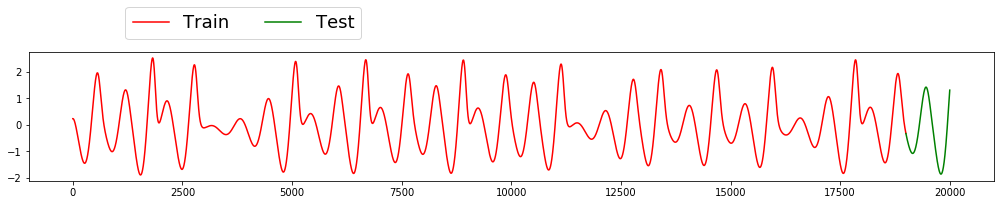

In [6]:
trainTarget, testTarget, inputTrain, inputTest = prepareData(target, train_perc=0.95, plotshow=True)

Training mean square error:  1.7261750191810517e-05
Testing  mean square error:  0.07557669360849814


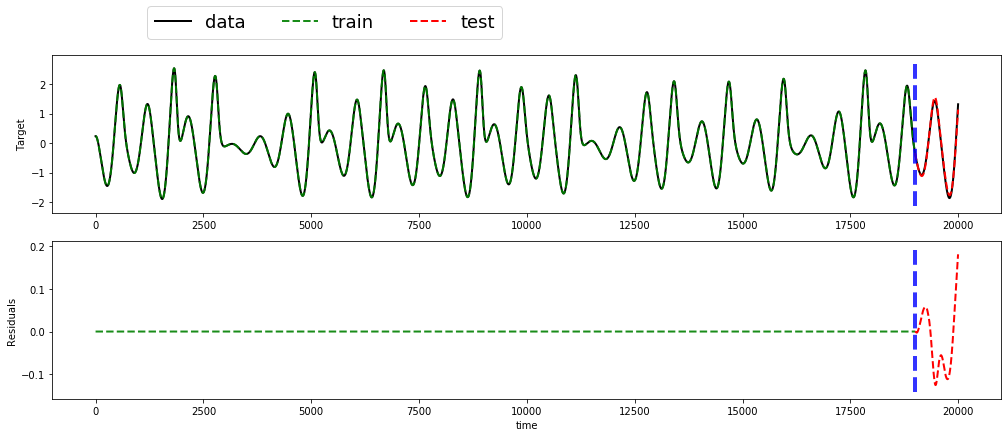

In [7]:
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 1.45, 
          sparsity=.20,
          noise = 0.0001,
          random_state=42
         )

# Train and predict 
fit = esn.fit(inputTrain, trainTarget)
pred = prediction = esn.predict(inputTest)

# MSE in the training and testing
scoreTrain = myMSE(fit,trainTarget)
scoreTest = myMSE(pred,testTarget)
print("Training mean square error: ",scoreTrain)
print("Testing  mean square error: ",scoreTest)
# # Residuals 
resTrain = residuals(fit,trainTarget)
resTest = residuals(pred,testTarget)

# # Plot:
plotResults(target, fit, pred, resTrain, resTest)

#### Hyper-parameters optimization

In [ ]:
radius_set = [0.9,  1,  1.1]

# noise_set = [ 0.001, 0.004, 0.006]



esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 1.45, 
          sparsity=.20,
          noise = 0.0001,
          random_state=42)
        

## Long Term Forecast

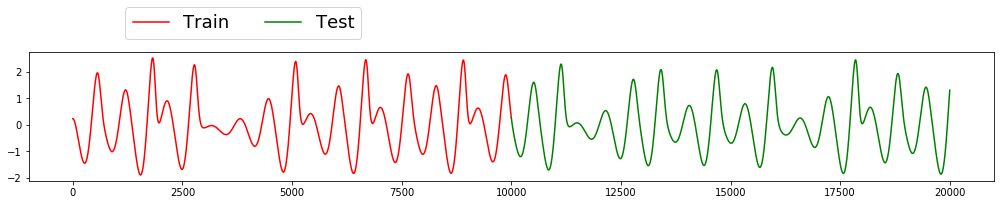

In [15]:
trainTarget, testTarget, inputTrain, inputTest = prepareData(target, train_perc=0.5, plotshow=True)

Training mean square error:  1.1187271410380974e-05
Testing  mean square error:  1.3774250989224337


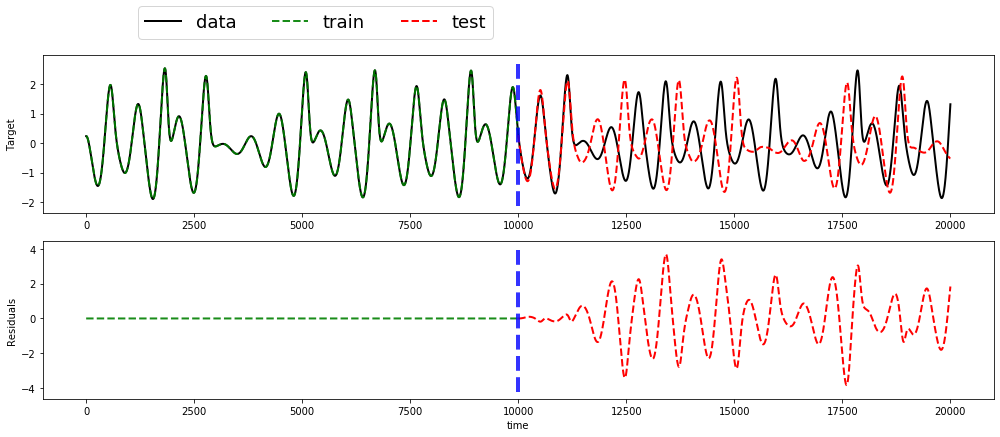

In [22]:
esn = ESN(n_inputs = 1,
          n_outputs = 1,
          n_reservoir = 1500,
          spectral_radius = 1.45, 
          sparsity=.20,
          noise = 0.0001,
          random_state=42
         )

# Train and predict 
fit = esn.fit(inputTrain, trainTarget)
pred = prediction = esn.predict(inputTest)

# MSE in the training and testing
scoreTrain = myMSE(fit,trainTarget)
scoreTest = myMSE(pred,testTarget)
print("Training mean square error: ",scoreTrain)
print("Testing  mean square error: ",scoreTest)
# # Residuals 
resTrain = residuals(fit,trainTarget)
resTest = residuals(pred,testTarget)

# # Plot:
plotResults(target, fit, pred, resTrain, resTest)

### Using Observers: Inference

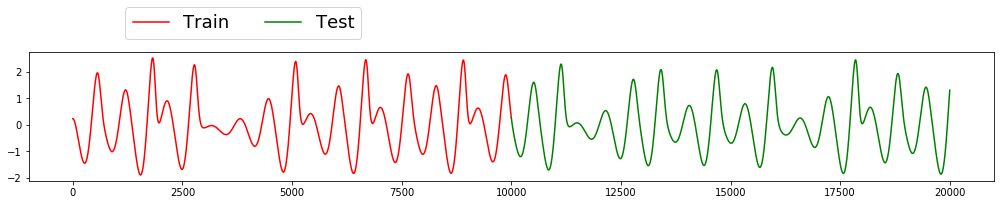

In [12]:
trainTarget, testTarget, inputTrain, inputTest = prepareData(target, train_perc=0.5, plotshow=True)

In [16]:
obs1 = ydata
obs2 = zdata

trainObs1= obs1[:len(trainTarget)]
testObs1 = obs1[len(trainTarget):len(trainTarget)+len(testTarget)]
trainObs2= obs2[:len(trainTarget)]
testObs2 = obs2[len(trainTarget):len(trainTarget)+len(testTarget)]

inputTrain_obs = np.stack((inputTrain,trainObs1,trainObs2), axis=1)
inputTest_obs  = np.stack((inputTest,testObs1,testObs2), axis=1)
n_inp = len(inputTrain_obs.T)

Training mean square error:  0.02613880313549841
Testing  mean square error:  0.3059691161354868


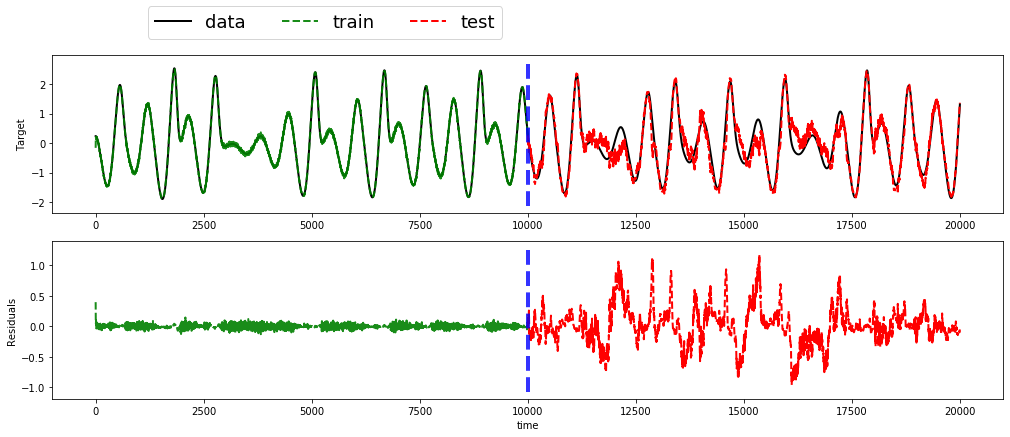

In [23]:
esn = ESN(n_inputs = n_inp,
          n_outputs = 1,
          n_reservoir = 1000,
          spectral_radius = 2.,
          sparsity=.20,
          noise = 0.0001,
          random_state=42
         )

# Train and predict 
fit = esn.fit(inputTrain_obs, trainTarget)
pred = prediction = esn.predict(inputTest_obs)

# MSE in the training and testing
scoreTrain = myMSE(fit,trainTarget)
scoreTest = myMSE(pred,testTarget)
print("Training mean square error: ",scoreTrain)
print("Testing  mean square error: ",scoreTest)
# # Residuals 
resTrain = residuals(fit,trainTarget)
resTest = residuals(pred,testTarget)

# # Plot:
plotResults(target, fit, pred, resTrain, resTest)